In [1]:
import numpy as np

import os

from scipy import stats
from scipy.stats import norminvgauss, norm, pareto, levy_stable

import random

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [185]:
def SGD_noise_distplots(SGD_noise, distribution, dist_name, bins, filepath):

    params = distribution.fit(SGD_noise)
    Theoretical_dist = distribution(*params)
    x = np.linspace(SGD_noise.min(), SGD_noise.max(), len(SGD_noise))

    SGD_noise_hist = np.histogram(SGD_noise ,bins = bins)

    plt.figure(figsize=(12, 12))
    plt.hist(SGD_noise, density=True, bins=bins, label='SGN')
    plt.plot(x, Theoretical_dist.pdf(x), '--', color='black', label='Gaussian')
    plt.xlabel('SGN', size=13)
    plt.ylabel('Density', size=13)
#     plt.title('SGD noise hist', size=15)
    plt.legend(fontsize=15)
    plt.savefig(filepath + 'SGNdist.png')
    plt.show()

    plt.figure(figsize=(12, 12))    
    plt.plot(SGD_noise_hist[1][:-1],SGD_noise_hist[0],'o',  color='black', label='SGN')
    plt.plot(x, Theoretical_dist.pdf(x), '--', color='black', label=dist_name)
    plt.xlabel('SGD noise', size=13)
    plt.ylabel('Density', size=13)
#     plt.title('SGD noise dotted hist', size=15)
    plt.legend(fontsize=15)
    plt.savefig(filepath + 'dotted_SGNdist.png')
    plt.show()
    
    plt.figure(figsize=(12, 12))
    plt.yscale('log')
    plt.plot(SGD_noise_hist[1][:-1],SGD_noise_hist[0],'o',  color='black', label='SGD Noise')
    plt.plot(x, Theoretical_dist.pdf(x), '--', color='black', label=dist_name)
    plt.xlabel('SGD noise', size=13)
    plt.ylabel('log-scaled Density', size=13)
#     plt.title('SGD noise dotted log hist', size=15)
    plt.legend(fontsize=15)
    plt.savefig(filepath + 'dotted_log_SGNdist.png')
    plt.show()
        
    plt.figure(figsize=(12, 12))
    stats.probplot(SGD_noise, dist=Theoretical_dist, plot=plt)
#     plt.title('SGD noise QQ-plot', size=15)
    plt.xlabel('Theoretical Quantiles', size=13)
    plt.ylabel('Sample Quantiles', size=13)
    plt.grid(True)
    plt.savefig(filepath + 'QQ_plot_SGNdist.png')
    plt.show()
    

In [52]:
def SGD_noise_distplots(SGD_noise, distribution, dist_name, bins, filepath):

    params = distribution.fit(SGD_noise)
    Theoretical_dist = distribution(*params)
    x = np.linspace(SGD_noise.min(), SGD_noise.max(), len(SGD_noise))

    SGD_noise_hist = np.histogram(SGD_noise ,bins = bins)

    fig, axs = plt.subplots(3, 1, figsize=(6, 16))
    # axs[0].hist(SGD_noise, density=True, bins=bins, color='white', ec='black', label='SGD Noise')
    axs[0].hist(SGD_noise, density=True, bins=bins, label='SGN')
    #axs[0].hist(Theoretical_dist.rvs(size=len(SGD_noise)), density=True, bins=bins, label=dist_name, alpha=0.6)
    axs[0].plot(x, Theoretical_dist.pdf(x), '--', linewidth=3, label='Gaussian')
    axs[0].set_xlabel('SGN', size=13)
    axs[0].set_ylabel('Density', size=13)
    axs[0].set_title('SGN hist', size=15)
    axs[0].legend(fontsize=15)
    

#     axs[1].plot(SGD_noise_hist[1][:-1],SGD_noise_hist[0],'o',  color='black', label='SGD Noise')
#     axs[1].plot(x, Theoretical_dist.pdf(x), '--', color='black', label=dist_name)
#     axs[1].set_xlabel('SGD noise', size=13)
#     axs[1].set_ylabel('Density', size=13)
#     axs[1].set_title('SGD noise dotted hist', size=15)
#     axs[1].legend(fontsize=15)

    axs[1].set_yscale('log')
    axs[1].plot(SGD_noise_hist[1][:-1],SGD_noise_hist[0],'o',  color='black', label='SGN')
    axs[1].plot(x, Theoretical_dist.pdf(x), '--', color='black', label=dist_name)
    axs[1].set_xlabel('SGN', size=13)
    axs[1].set_ylabel('log-scaled Density', size=13)
    axs[1].set_title('SGN dotted log hist', size=15)
    axs[1].legend(fontsize=15)

    stats.probplot(SGD_noise, dist=Theoretical_dist, plot=plt)
    plt.title('SGN QQ-plot', size=15)
    plt.xlabel('Theoretical Quantiles', size=13)
    plt.ylabel('Sample Quantiles', size=13)
    plt.grid(True)
    
    plt.savefig(filepath + 'SGNdist_analysis.png')
    
    plt.show()  

    
def alpha_dynamics(mean_alphas, params, filepath):
    plt.figure(figsize=(6, 6))
    plt.plot(params, mean_alphas, 'o-', label=f'batch {batch_size}, width {width}, depth {depth}')
    plt.xlabel('Iterations', size=13)
    plt.ylabel(r'mean $ \alpha $', size=13)
    plt.title(r'$ \alpha $ dynamics', size=15)
    plt.legend(fontsize=15)
    plt.grid(True)
    plt.savefig(filepath + '/alphas_dynamics.png')
    plt.show()
    


## SGN analysis

In [53]:
filepath = 'exp_storage/'
width = 32
depth = 2
batch = 40

with open(filepath + f'width_{width}_depth_{depth}_batch_{batch}' + '/sgn_samples.npy', 'rb') as file:
    sgn_storage = np.load(file)
sgn_storage.shape

(150, 56, 1500)

# Iteration 100 

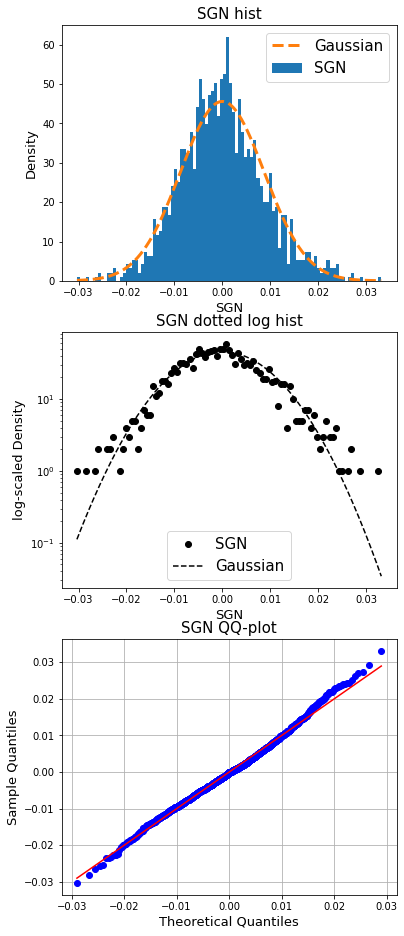

In [54]:
iteration = 100    
    
SGD_noise_distplots(SGD_noise=sgn_storage[iteration//100 - 1][20], 
                    distribution=norm, 
                    dist_name='Gaussian', 
                    bins=100, 
                    filepath=filepath + f'width_{width}_depth_{depth}_batch_{batch}/iteration_{iteration}_')

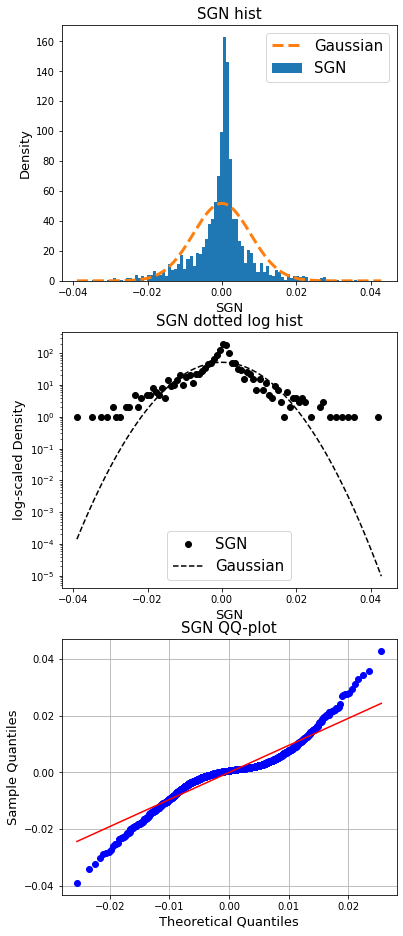

In [55]:
iteration = 5000    
    
SGD_noise_distplots(SGD_noise=sgn_storage[iteration//100 - 1][20], 
                    distribution=norm, 
                    dist_name='Gaussian', 
                    bins=100, 
                    filepath=filepath + f'width_{width}_depth_{depth}_batch_{batch}/iteration_{iteration}_')

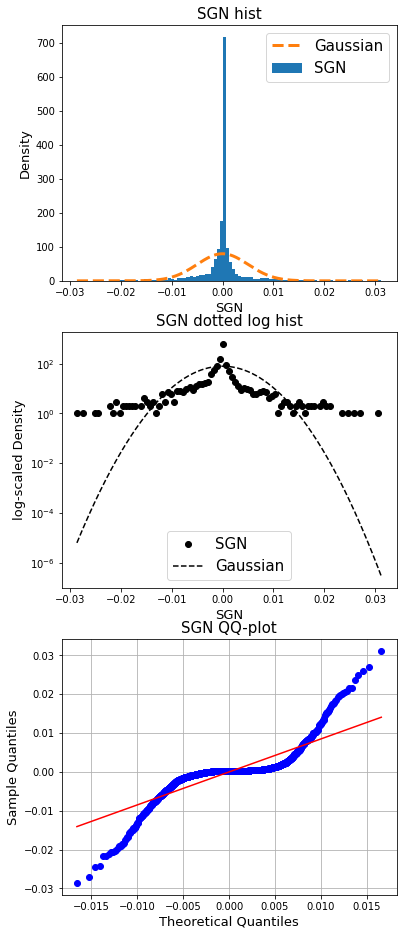

In [56]:
iteration = 15000    
    
SGD_noise_distplots(SGD_noise=sgn_storage[iteration//100 - 1][20], 
                    distribution=norm, 
                    dist_name='Gaussian', 
                    bins=100, 
                    filepath=filepath + f'width_{width}_depth_{depth}_batch_{batch}/iteration_{iteration}_')

## Batch's alpha dynamics

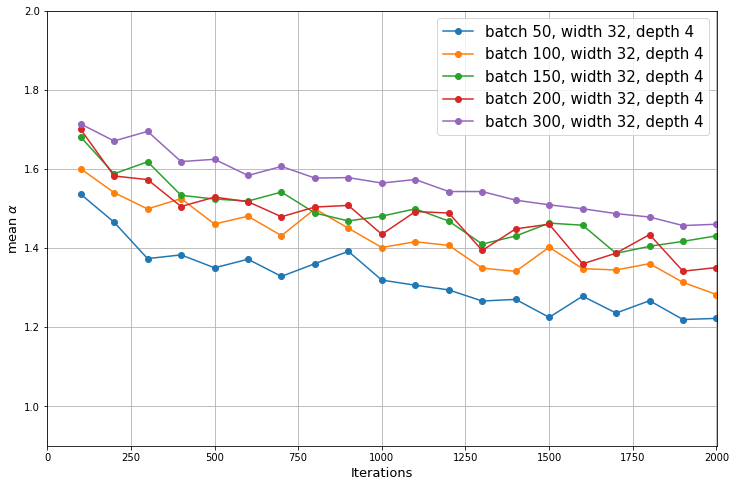

In [137]:
filepath = 'exp_storage/'
data_len = 60000
width = 32
depth = 4
epochs = 10
batch_sizes = [50, 100, 150, 200, 300]

plt.figure(figsize=(12, 8))

for batch_size in batch_sizes:
    total_iterations = epochs * (data_len / batch_size) / 100
    exp_setup = f'width_{width}_depth_{depth}_batch_{batch_size}'
    with open(filepath  + exp_setup + '/mean_alphas.npy', 'rb') as file:
        mean_alphas = np.load(file)
    plt.plot([100 * i for i in range(1, int(total_iterations + 1))], mean_alphas, 'o-', label=f'batch {batch_size}, width {width}, depth {depth}')
plt.xlabel('Iterations', size=13)
plt.ylabel(r'mean $ \alpha $', size=13)
plt.axis([0, 2001, 0.9, 2])
# plt.title(r'$ \alpha $ dynamics', size=15)
plt.legend(fontsize=15)
plt.grid(True)
# plt.savefig(filepath + '/batch_alphas_dynamics.png')

plt.show()


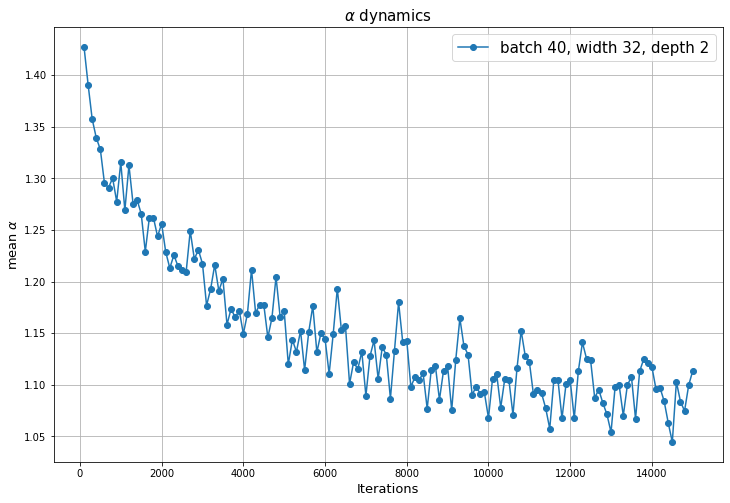

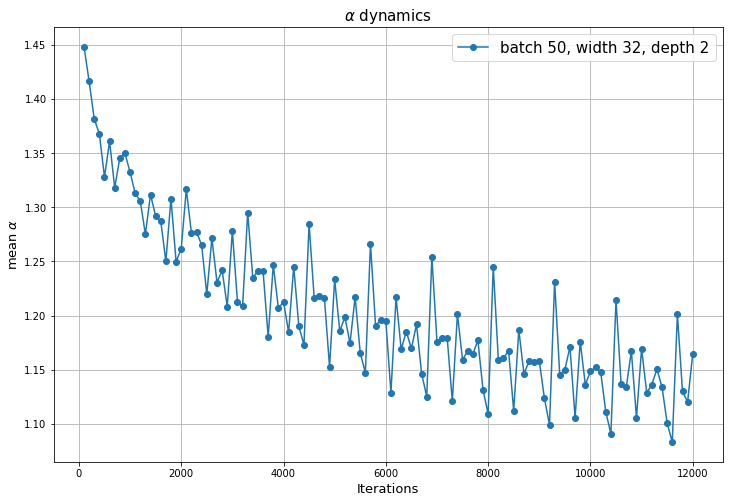

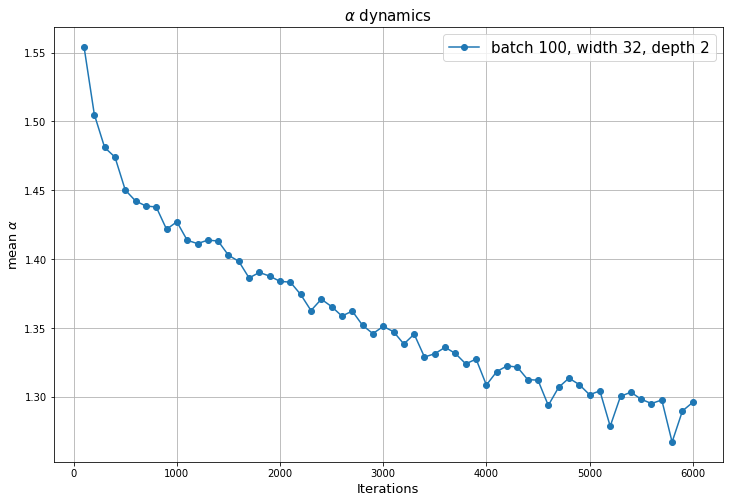

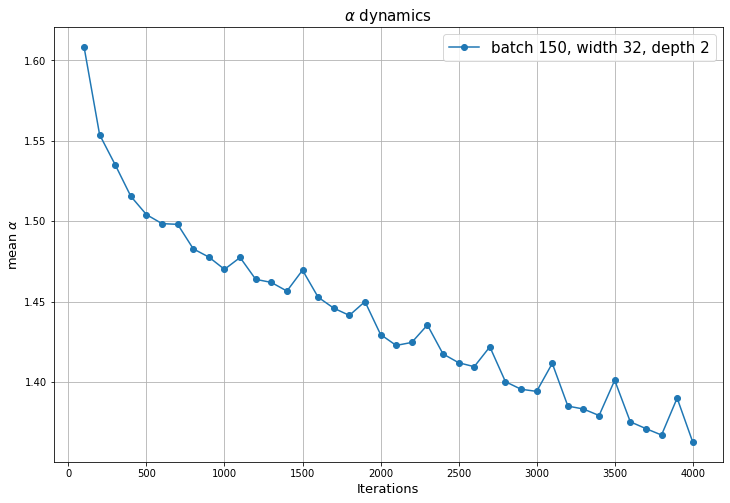

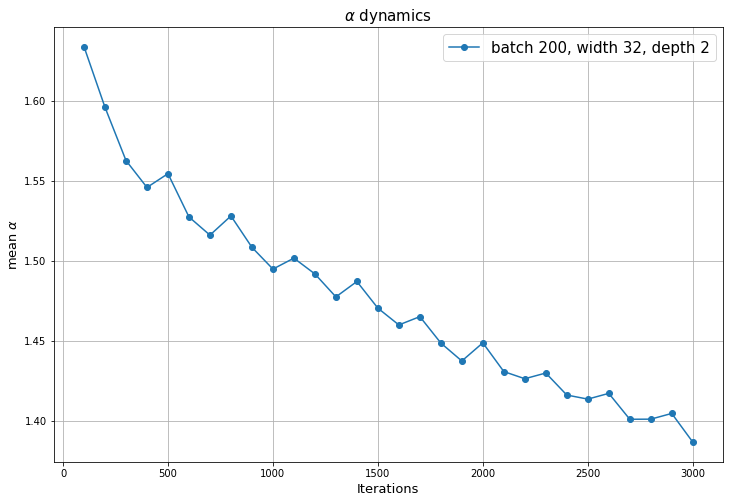

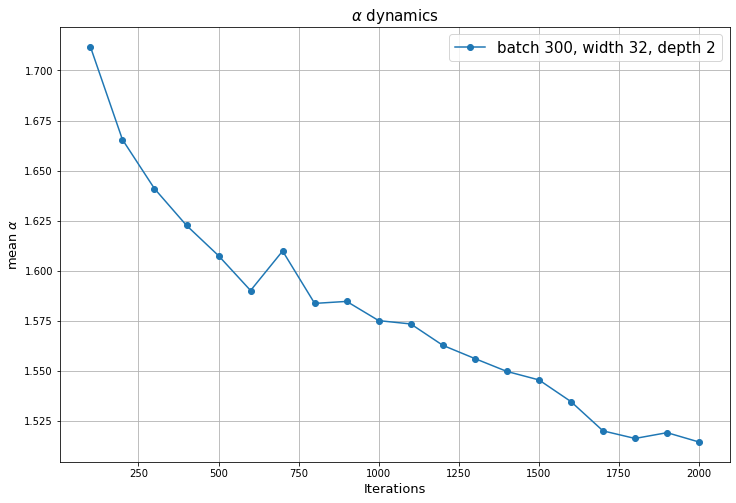

In [3]:
filepath = 'exp_storage/'
data_len = 60000
width = 32
depth = 2
epochs = 10
batch_sizes = [40, 50, 100, 150, 200, 300]
for batch_size in batch_sizes:
    total_iterations = epochs * (data_len / batch_size) / 100
    exp_setup = f'width_{width}_depth_{depth}_batch_{batch_size}'
    with open(filepath  + exp_setup + '/mean_alphas.npy', 'rb') as file:
        mean_alphas = np.load(file)
    alpha_dynamics(mean_alphas, [100 * i for i in range(1, int(total_iterations + 1))], filepath + exp_setup)
plt.show()


## Depth alpha dynamics

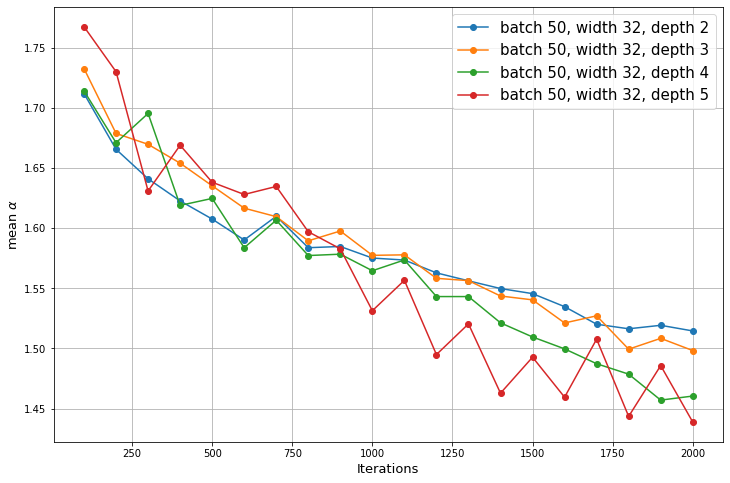

In [12]:
filepath = 'exp_storage/'
data_len = 60000
width = 32
depths = [2, 3, 4, 5]
epochs = 10
batch_sizes = 50

plt.figure(figsize=(12, 8))

for depth in depths:
    total_iterations = epochs * (data_len / batch_size) / 100
    exp_setup = f'width_{width}_depth_{depth}_batch_{batch_size}'
    with open(filepath  + exp_setup + '/mean_alphas.npy', 'rb') as file:
        mean_alphas = np.load(file)
    plt.plot([100 * i for i in range(1, int(total_iterations + 1))], mean_alphas, 'o-', label=f'batch {batch_sizes}, width {width}, depth {depth}')
plt.xlabel('Iterations', size=13)
plt.ylabel(r'mean $ \alpha $', size=13)
# plt.axis([0, 2001, 0, 2])
# plt.title(r'$ \alpha $ dynamics', size=15)
plt.legend(fontsize=15)
plt.grid(True)
plt.savefig(filepath + '/depth_alphas_dynamics.png')

plt.show()


(120,)
(120,)
(120,)
(120,)


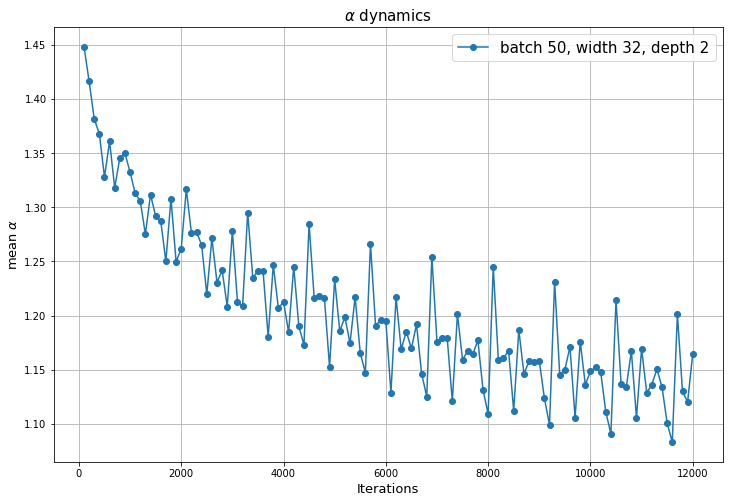

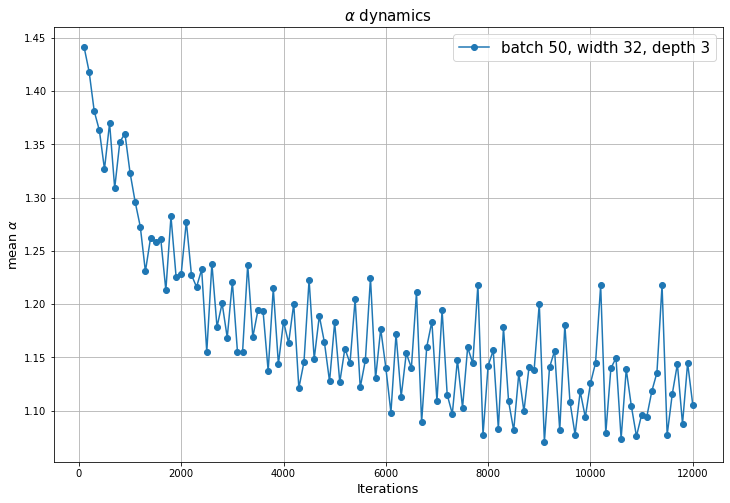

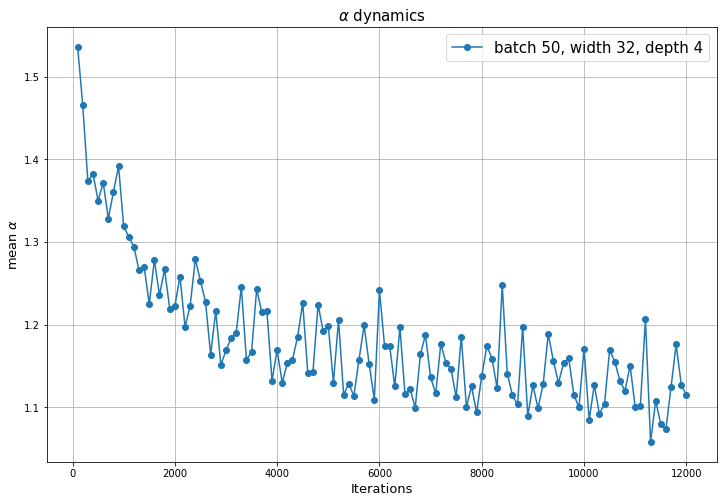

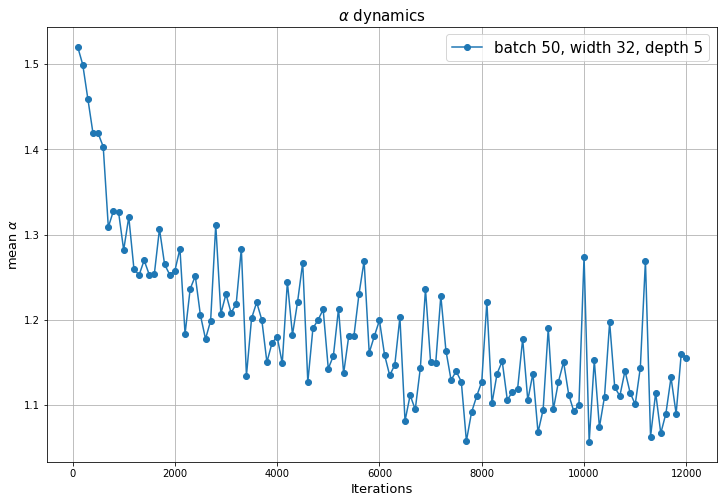

In [17]:
filepath = 'exp_storage/'
data_len = 60000
width = 32
depths = [2, 3, 4, 5]
epochs = 10
batch_size = 50
for depth in depths:
    total_iterations = epochs * (data_len / batch_size) / 100
    exp_setup = f'width_{width}_depth_{depth}_batch_{batch_size}'
    with open(filepath  + exp_setup + '/mean_alphas.npy', 'rb') as file:
        mean_alphas = np.load(file)
    alpha_dynamics(mean_alphas, [100 * i for i in range(1, int(total_iterations + 1))], filepath + exp_setup)
    print(mean_alphas.shape)

## depth width alpha dynamics

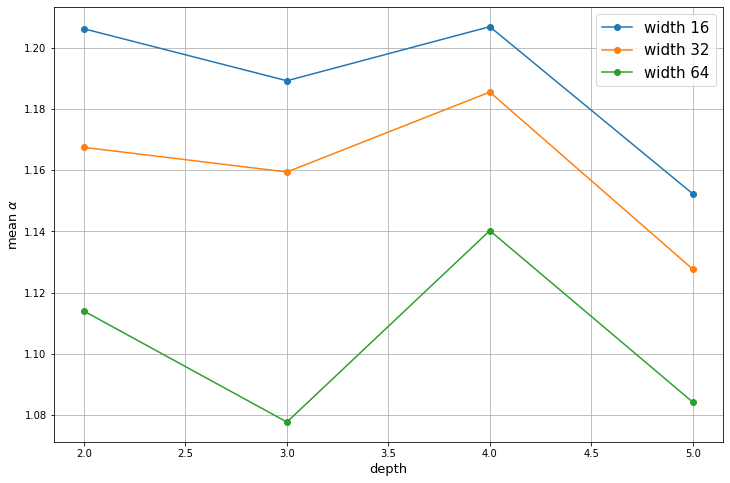

In [107]:
filepath = 'exp_storage/'
data_len = 60000
widths = [16, 32, 64]
depths = [2, 3, 4, 5]
epochs = 10
batch_sizes = 50

plt.figure(figsize=(12, 8))

mean_alphas = []
for width in widths: 
    mean_alphas_width = []
    for depth in depths:
        total_iterations = epochs * (data_len / batch_size) / 100
        exp_setup = f'width_{width}_depth_{depth}_batch_{batch_sizes}'
        with open(filepath  + exp_setup + '/mean_alphas.npy', 'rb') as file:
            mean_alphas_width.append(np.load(file)[75])
    mean_alphas.append(mean_alphas_width)
    plt.plot(depths, mean_alphas[-1], 'o-', label=f'width {width}')
plt.xlabel('depth', size=13)
plt.ylabel(r'mean $ \alpha $', size=13)
# plt.axis([0, 2001, 0, 2])
# plt.title(r'$ \alpha $ dynamics', size=15)
plt.legend(fontsize=15)
plt.grid(True)
# plt.savefig(filepath + '/depth_alphas_dynamics.png')

plt.show()


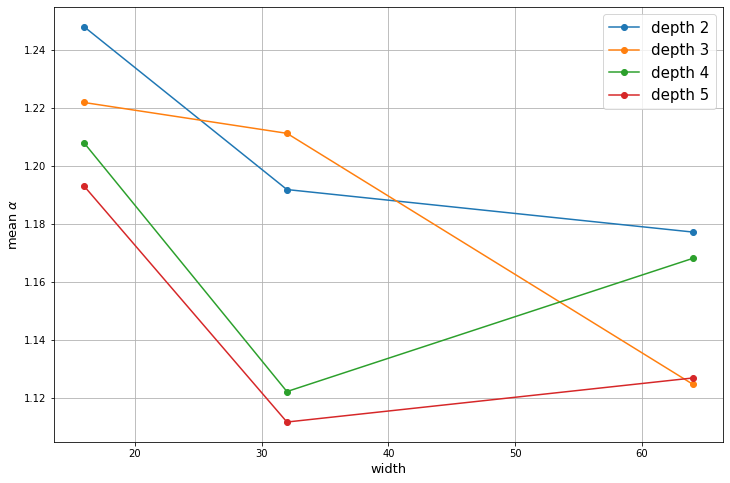

In [133]:
filepath = 'exp_storage/'
data_len = 60000
widths = [16, 32, 64]
depths = [2, 3, 4, 5]
epochs = 10
batch_sizes = 50

plt.figure(figsize=(12, 8))

mean_alphas = []
for depth in depths:
    mean_alphas_depth = []
    for width in widths:
        total_iterations = epochs * (data_len / batch_size) / 100
        exp_setup = f'width_{width}_depth_{depth}_batch_{batch_sizes}'
        with open(filepath  + exp_setup + '/mean_alphas.npy', 'rb') as file:
            mean_alphas_depth.append(np.load(file)[65])
    mean_alphas.append(mean_alphas_depth)
    plt.plot(widths, mean_alphas[-1], 'o-', label=f'depth {depth}')
plt.xlabel('width', size=13)
plt.ylabel(r'mean $ \alpha $', size=13)
# plt.axis([0, 2001, 0, 2])
# plt.title(r'$ \alpha $ dynamics', size=15)
plt.legend(fontsize=15)
plt.grid(True)
# plt.savefig(filepath + '/width_alphas_dynamics.png')

plt.show()
